In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
fi = pd.read_csv('/content/drive/MyDrive/Manchiriyal.csv')
print(fi.shape)
fi


(10, 9)


,S.No.,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),EC,TSS,Year
0,1,5.50,7.96,3.00,21.0,32.0,504,12.0,2014
1,2,5.80,7.52,3.02,9.0,20.0,411,19.0,2015
2,3,5.50,7.96,3.00,21.0,32.0,386,20.0,2016
3,4,5.30,8.30,4.00,9.0,30.0,409,10.0,2017
4,5,5.20,8.12,3.00,5.0,32.0,510,7.0,2018
5,6,5.40,7.98,2.90,6.0,13.0,554,6.0,2019
6,7,5.50,8.08,2.30,10.0,18.0,508,13.0,2020
7,8,5.80,7.88,2.30,7.0,19.0,520,8.0,2021
8,9,5.90,8.05,1.30,6.0,12.0,532,10.0,2022
9,10,5.93,7.73,1.68,5.4,22.6,497,10.2,2023


In [ ]:
cols = list(fi)[1:8]
print(cols)

['DO (mg/L)', 'pH', 'BOD (mg/L)', 'Turbidity (NTU)', 'COD (mg/L)', 'EC', 'TSS']


<Axes: >

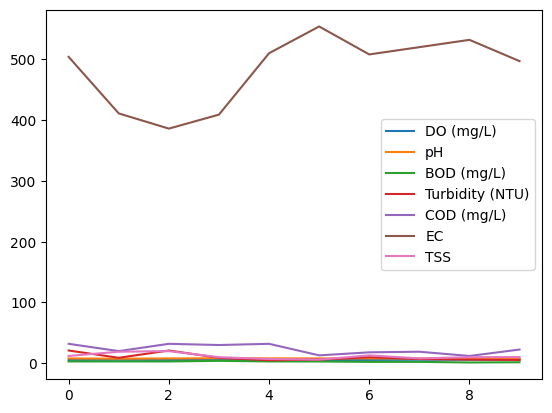

In [ ]:
df_for_training = fi[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),EC,TSS
0,5.50,7.96,3.00,21.0,32.0,504.0,12.0
1,5.80,7.52,3.02,9.0,20.0,411.0,19.0
2,5.50,7.96,3.00,21.0,32.0,386.0,20.0
3,5.30,8.30,4.00,9.0,30.0,409.0,10.0
4,5.20,8.12,3.00,5.0,32.0,510.0,7.0
5,5.40,7.98,2.90,6.0,13.0,554.0,6.0
6,5.50,8.08,2.30,10.0,18.0,508.0,13.0
7,5.80,7.88,2.30,7.0,19.0,520.0,8.0
8,5.90,8.05,1.30,6.0,12.0,532.0,10.0
9,5.93,7.73,1.68,5.4,22.6,497.0,10.2


In [ ]:
n_future = 1
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []
trainYA = []
trainYB = []
trainYC = []
trainYD = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
  trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])
  trainYA.append(df_for_training_scaled[i + n_future - 1:i + n_future, 3])
  trainYB.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
  trainYC.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])
  trainYD.append(df_for_training_scaled[i + n_future - 1:i + n_future, 6])


In [ ]:
print( trainX)
print(trainYP)

[array([[-0.33997839,  0.00979451,  0.47638672,  1.92202838,  1.19133939,
         0.37615916,  0.10734844],
       [ 0.88885918, -2.14499811,  0.50360882, -0.16335503, -0.40777388,
        -1.29765911,  1.67284652],
       [-0.33997839,  0.00979451,  0.47638672,  1.92202838,  1.19133939,
        -1.74761025,  1.89648911]]), array([[ 0.88885918, -2.14499811,  0.50360882, -0.16335503, -0.40777388,
        -1.29765911,  1.67284652],
       [-0.33997839,  0.00979451,  0.47638672,  1.92202838,  1.19133939,
        -1.74761025,  1.89648911],
       [-1.15920344,  1.67486154,  1.83749165, -0.16335503,  0.92482051,
        -1.3336552 , -0.33993673]]), array([[-0.33997839,  0.00979451,  0.47638672,  1.92202838,  1.19133939,
        -1.74761025,  1.89648911],
       [-1.15920344,  1.67486154,  1.83749165, -0.16335503,  0.92482051,
        -1.3336552 , -0.33993673],
       [-1.56881597,  0.79335546,  0.47638672, -0.85848284,  1.19133939,
         0.48414743, -1.01086448]]), array([[-1.15920344, 

In [ ]:
trainX, trainYP, trainYN, trainYS,trainYA,trainYB,trainYC,trainYD= np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS),np.array(trainYA),np.array(trainYB),np.array(trainYC),np.array(trainYD)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))
print('trainYA shape == {}.'.format(trainYA.shape))
print('trainYB shape == {}.'.format(trainYB.shape))
print('trainYC shape == {}.'.format(trainYC.shape))
print('trainYD shape == {}.'.format(trainYD.shape))

trainX shape == (7, 3, 7).
trainYP shape == (7, 1).
trainYN shape == (7, 1).
trainYS shape == (7, 1).
trainYA shape == (7, 1).
trainYB shape == (7, 1).
trainYC shape == (7, 1).
trainYD shape == (7, 1).


In [ ]:
list1=[]

In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             18432     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 6s 607ms/step - loss: 1.2012 - val_loss: 1.9379
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 1.1799 - val_loss: 1.9356
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 1.1387 - val_loss: 1.9227
Epoch 4/50
2/2 [==============================] - 0s 42ms/step - loss: 1.1338 - val_loss: 1.9118
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 1.1051 - val_loss: 1.9003
Epoch 6/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0894 - val_loss: 1.8889
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 1.0642 - val_loss: 1.8769
Epoch 8/50
2/2 [==============================] - 0s 44ms/step - loss: 1.0786 - val_loss: 1.8615
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0435 - val_loss: 1.8429
Epoch 10/50
2/2 [==============================] - 0s 66ms/step - loss: 1.0301 - val_loss: 1.8181
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

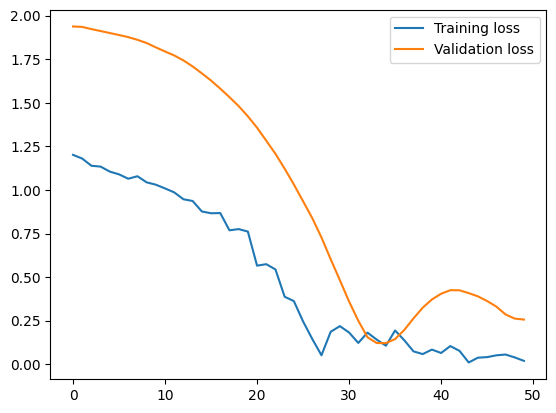

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 399ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)

[5.3268433 5.234008  5.369948  5.544073  5.7722917 5.894298  5.806445 ]


In [ ]:
print(y_pred_futureP[-1])
i=y_pred_futureP[-1]
do=((i)*100/9)*0.3723
do

5.806445


24.01932798703512

In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 482ms/step - loss: 0.7569 - val_loss: 1.1775
Epoch 2/50
2/2 [==============================] - 0s 46ms/step - loss: 0.6930 - val_loss: 1.2097
Epoch 3/50
2/2 [==============================] - 0s 82ms/step - loss: 0.6791 - val_loss: 1.2406
Epoch 4/50
2/2 [==============================] - 0s 77ms/step - loss: 0.6892 - val_loss: 1.2672
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 0.6401 - val_loss: 1.2884
Epoch 6/50
2/2 [==============================] - 0s 84ms/step - loss: 0.6664 - val_loss: 1.3069
Epoch 7/50
2/2 [==============================] - 0s 81ms/step - loss: 0.6323 - val_loss: 1.3271
Epoch 8/50
2/2 [==============================] - 0s 65ms/step - loss: 0.5870 - val_loss: 1.3453
Epoch 9/50
2/2 [==============================] - 0s 56ms/step - loss: 0.6218 - val_loss: 1.3648
Epoch 10/50
2/2 [==============================] - 0s 81ms/step - loss: 0.6080 - val_loss: 1.3823
Epoch 11/50
2/2 [===========

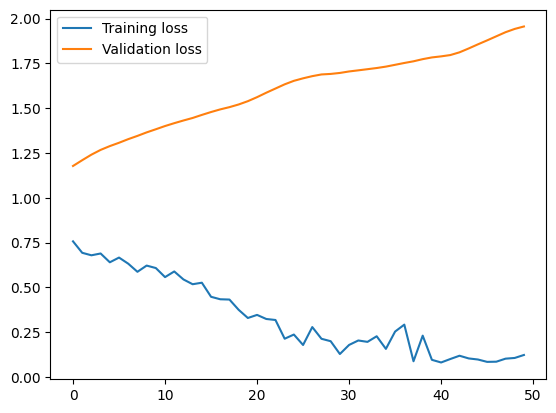

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX)

1/1 [==============================] - 0s 397ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
print(y_pred_futureN)

[8.284528 8.130082 8.035899 8.000622 7.965203 8.011112 8.015563]


In [ ]:
print(y_pred_futureN[-1])
i=y_pred_futureN[-1]
ph=((i-7)*100/1.5)*0.1176

8.015563


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 465ms/step - loss: 1.2413 - val_loss: 1.7947
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 1.2117 - val_loss: 1.7735
Epoch 3/50
2/2 [==============================] - 0s 48ms/step - loss: 1.1961 - val_loss: 1.7469
Epoch 4/50
2/2 [==============================] - 0s 46ms/step - loss: 1.1563 - val_loss: 1.7247
Epoch 5/50
2/2 [==============================] - 0s 64ms/step - loss: 1.1298 - val_loss: 1.7059
Epoch 6/50
2/2 [==============================] - 0s 40ms/step - loss: 1.1140 - val_loss: 1.6871
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0789 - val_loss: 1.6672
Epoch 8/50
2/2 [==============================] - 0s 44ms/step - loss: 1.0486 - val_loss: 1.6485
Epoch 9/50
2/2 [==============================] - 0s 48ms/step - loss: 1.0200 - val_loss: 1.6267
Epoch 10/50
2/2 [==============================] - 0s 46ms/step - loss: 0.9911 - val_loss: 1.6040
Epoch 11/50
2/2 [===========

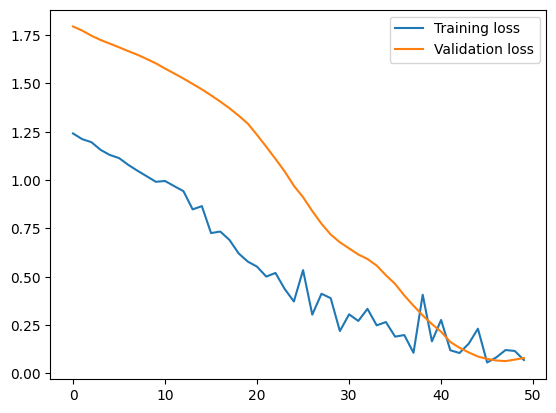

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 1s 544ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[3.9409728 3.2679193 2.8837347 2.3894858 2.0359535 1.5068313 1.8867342]


In [ ]:
i=y_pred_futureS[-1]
bod=(i*100/25)*0.3723
print(i)

1.8867342


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYA.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 466ms/step - loss: 1.2180 - val_loss: 1.7418
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 1.2213 - val_loss: 1.7301
Epoch 3/50
2/2 [==============================] - 0s 61ms/step - loss: 1.1881 - val_loss: 1.7192
Epoch 4/50
2/2 [==============================] - 0s 47ms/step - loss: 1.1728 - val_loss: 1.7081
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 1.1469 - val_loss: 1.6956
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 1.1537 - val_loss: 1.6812
Epoch 7/50
2/2 [==============================] - 0s 62ms/step - loss: 1.0947 - val_loss: 1.6681
Epoch 8/50
2/2 [==============================] - 0s 62ms/step - loss: 1.0794 - val_loss: 1.6526
Epoch 9/50
2/2 [==============================] - 0s 59ms/step - loss: 1.0523 - val_loss: 1.6364
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0334 - val_loss: 1.6193
Epoch 11/50
2/2 [===========

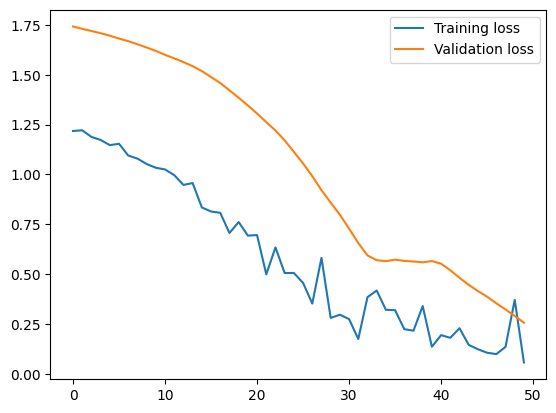

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 335ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[3.8100479 3.159399  2.8296483 2.326789  1.9540123 1.451599  2.052101 ]


In [ ]:
i=y_pred_futureS[-1]
tur=(i*100/5)*0.1
print(tur)

4.104201793670654


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYB.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 804ms/step - loss: 1.2909 - val_loss: 1.6753
Epoch 2/50
2/2 [==============================] - 0s 94ms/step - loss: 1.2744 - val_loss: 1.6567
Epoch 3/50
2/2 [==============================] - 0s 78ms/step - loss: 1.2343 - val_loss: 1.6392
Epoch 4/50
2/2 [==============================] - 0s 63ms/step - loss: 1.1984 - val_loss: 1.6158
Epoch 5/50
2/2 [==============================] - 0s 62ms/step - loss: 1.1870 - val_loss: 1.5941
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 1.1446 - val_loss: 1.5706
Epoch 7/50
2/2 [==============================] - 0s 77ms/step - loss: 1.1441 - val_loss: 1.5460
Epoch 8/50
2/2 [==============================] - 0s 65ms/step - loss: 1.1344 - val_loss: 1.5220
Epoch 9/50
2/2 [==============================] - 0s 91ms/step - loss: 1.0832 - val_loss: 1.4961
Epoch 10/50
2/2 [==============================] - 0s 77ms/step - loss: 1.1138 - val_loss: 1.4704
Epoch 11/50
2/2 [===========

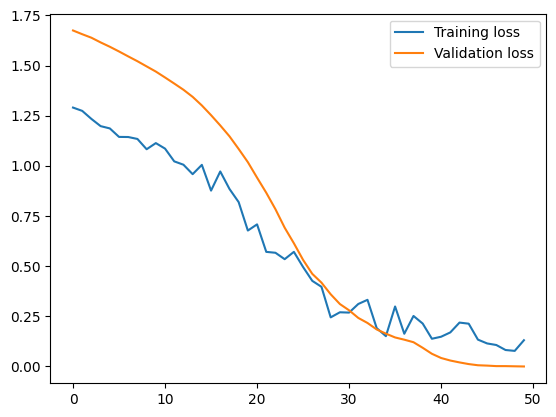

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 350ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)
i=y_pred_futureS[-1]
cod=(i*100/10)*0.12
print(cod)

[3.650508  3.1283767 2.875248  2.4043071 2.0687468 1.3190902 1.6837527]
2.0205031871795653


In [ ]:
l=[do,ph,bod,tur,cod]
print(l)
print(sum(l))

[24.01932798703512, 7.962014007568359, 2.80972464094162, 4.104201793670654, 2.0205031871795653]
40.91577161639532


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYC.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 732ms/step - loss: 1.1732 - val_loss: 2.0703
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 1.1546 - val_loss: 2.0656
Epoch 3/50
2/2 [==============================] - 0s 74ms/step - loss: 1.1222 - val_loss: 2.0538
Epoch 4/50
2/2 [==============================] - 0s 59ms/step - loss: 1.0879 - val_loss: 2.0456
Epoch 5/50
2/2 [==============================] - 0s 70ms/step - loss: 1.0350 - val_loss: 2.0407
Epoch 6/50
2/2 [==============================] - 0s 81ms/step - loss: 1.0309 - val_loss: 2.0321
Epoch 7/50
2/2 [==============================] - 0s 85ms/step - loss: 0.9716 - val_loss: 2.0259
Epoch 8/50
2/2 [==============================] - 0s 82ms/step - loss: 0.9395 - val_loss: 2.0197
Epoch 9/50
2/2 [==============================] - 0s 72ms/step - loss: 0.8719 - val_loss: 2.0169
Epoch 10/50
2/2 [==============================] - 0s 75ms/step - loss: 0.8166 - val_loss: 2.0129
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

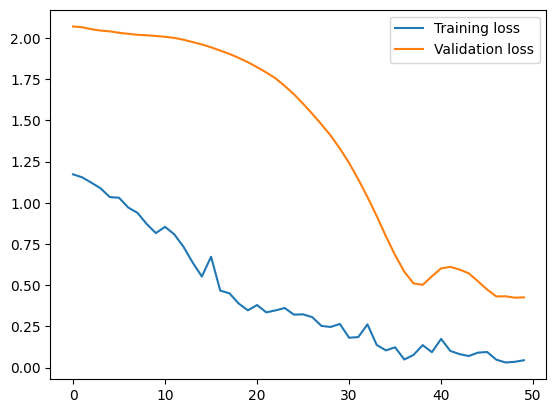

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 337ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)
ec=y_pred_futureP[-1]
print(ec)

[5.29728   5.2377453 5.37298   5.537285  5.760661  5.887046  5.770606 ]
5.770606


In [ ]:
l=[do,ph,bod,tur,cod,ec]
print(l)
WQI=sum(l)
print(WQI)

[24.01932798703512, 7.962014007568359, 2.80972464094162, 4.104201793670654, 2.0205031871795653, 5.770606]
46.68637765734991


In [ ]:
def get_WQI_bucket(x):
    if x>=0 and x <= 25:
        return "Excellent"
    elif x>=26 and x<=50:
        return "Good"
    elif x >=51 and x<=75:
        return "Poor"
    elif x>=76 and x<100:
        return "Very Poor"
    else:
        return "Not Suitable for drinking"
result=get_WQI_bucket(WQI)
print(result)

Good
